In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
import numpy as np
import pandas as pd

import os

#Analyse image

import cv2 as cv

from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import manifold, decomposition
from sklearn.neural_network import MLPClassifier

#Analyse NLP

from wordcloud import WordCloud
from PIL import Image
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF


D:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:172: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [3]:
PATH = 'D:\projet6\data\yelp_photos\photos\yelp_photos\photos'

<>:1: DeprecationWarning: invalid escape sequence \p
<>:1: DeprecationWarning: invalid escape sequence \p
C:\Users\MIKOZO~1\AppData\Local\Temp/ipykernel_11396/4218137192.py:1: DeprecationWarning: invalid escape sequence \p
  PATH = 'D:\projet6\data\yelp_photos\photos\yelp_photos\photos'


## Préparation des données
On génere un dataframe de 100 photos pour chaque catégories

In [4]:
nbPictures = 125
chunks = pd.read_json('D:\projet6\photos.json', lines=True, chunksize = nbPictures)

<>:2: DeprecationWarning: invalid escape sequence \p
<>:2: DeprecationWarning: invalid escape sequence \p
C:\Users\MIKOZO~1\AppData\Local\Temp/ipykernel_11396/3505534717.py:2: DeprecationWarning: invalid escape sequence \p
  chunks = pd.read_json('D:\projet6\photos.json', lines=True, chunksize = nbPictures)


In [5]:
df = pd.DataFrame(columns=['photo_id', 'label'])
x = 0
for chunk in chunks:
    if(x == 0):
        if ((chunk.iloc[0].label == 'drink') & len(chunk.label.value_counts()) == 1):
            df = pd.concat([df, chunk])   
            x = x + 1
    if(x == 1):    
        if ((chunk.iloc[0].label == 'food') & len(chunk.label.value_counts()) == 1):
            df = pd.concat([df, chunk])  
            x = x + 1
    if(x == 2):    
        if ((chunk.iloc[0].label == 'interior') & len(chunk.label.value_counts()) == 1):
            df = pd.concat([df, chunk])  
            x = x + 1
    if(x == 3):    
        if ((chunk.iloc[0].label == 'outside') & len(chunk.label.value_counts()) == 1):
            df = pd.concat([df, chunk])  
            x = x + 1
    if(x == 4):    
        if ((chunk.iloc[0].label == 'menu') & len(chunk.label.value_counts()) == 1):
            df = pd.concat([df, chunk])  
            x = x + 1
    if(x == 5):
        break

In [6]:
df['photo_id'] = df['photo_id'] + '.jpg'

In [7]:
df_train = df.sample(round(5*nbPictures*(4/5)),random_state=42)

In [8]:
df_train

,photo_id,label,business_id,caption
120072,tpzMwiNcWOnuM1jYvjNLRA.jpg,outside,JbmXVkmJtX8VpRj239b41A,
120110,bhp_9JOwY8L5ELftSiSNvQ.jpg,outside,1hzqU--WKTPU9gDYmaQiFA,3 so pretty and it is not even done!
40090,hhm39x5Cpm-_xquazQVRZQ.jpg,food,n3qGJmszol--_R6xzHcK1Q,Isn't it eye pleasing? Delicious as well :)*
40087,3mBIkW-BMU8hDSjGoLj5ng.jpg,food,IKWsLkiJLA4YwiIoxnaZaQ,
120105,dPavECIhN1GBJg1ik-ZILQ.jpg,outside,5ABERR9SNdO6I9U4dcJnyg,"Considering the source\, we know it's not true."
...,...,...,...,...
160003,DtC9JJPXVEVNUS_VC_r2oQ.jpg,menu,F0eaHDnN_-zF7KPZu1a2NQ,"Wine\, beer and cocktail menu and the late nig..."
160040,4q2omAxInbmHCmQ1fTFQ6A.jpg,menu,WAUlzuTQ1pQOP6HnyC9l9A,Available daily selection
160085,T5G3gDVk65B-SiEFlrGMBQ.jpg,menu,ysdjJlbPEqkOzsSrPDQwMQ,Menus fourseason boba tea
40096,tZrQZoESdnq30rT0ZdTbwQ.jpg,food,yK8aAyfrM0wa4Bhca91epw,


## Preprocessing

Essayons les différentes étapes sur une seule image pour les appliquer sur toutes par la suite

In [9]:
def show(image, title=None):
    if not title: title = img.shape 
    plt.title(f"{title}")
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

In [10]:
df_train.iloc[1].photo_id

'bhp_9JOwY8L5ELftSiSNvQ.jpg'

In [11]:
img = cv.imread(PATH + "\\" + df_train.iloc[1].photo_id)

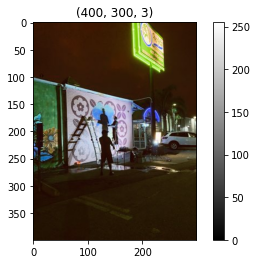

In [12]:
show(img)


On met la photo en noir et blanc

In [13]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

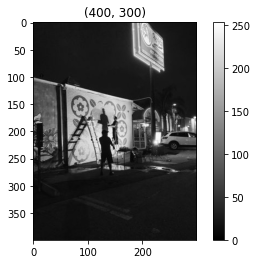

In [14]:
show(img)

On ajoute du flou gaussien

In [15]:
# Ajout de flou gaussien
img = Image.fromarray(img).convert('L')
img = img.filter(ImageFilter.BoxBlur(3))
img = np.array(img)

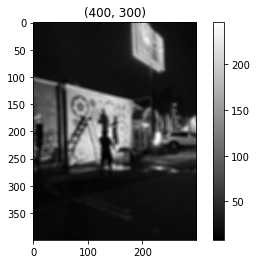

In [16]:
show(img)

Puis on égalise l'histogramme

In [17]:
def plot_histogram(grey_img):
    data = grey_img.flatten()
    plt.close()
    plt.hist(data)
    plt.show()

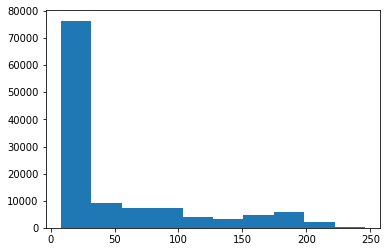

In [18]:
plot_histogram(img)

In [19]:
data = img.flatten()
unique_vals, cnts = np.unique(data, return_counts=True)

probabs = cnts/np.sum(cnts) # pdf
cdf = np.cumsum(probabs)

SCALE_FACTOR = 20
new_unique_values = np.ceil(cdf*SCALE_FACTOR) # ceiled-scaled-cdf

pd.DataFrame({
    "unique values": unique_vals,
    "probabilities": probabs,
    "cdf": cdf,
    "new unique values (ceiled-scaled-cdf)": new_unique_values
})

,unique values,probabilities,cdf,new unique values (ceiled-scaled-cdf)
0,8,0.000058,0.000058,1.0
1,9,0.000417,0.000475,1.0
2,10,0.000933,0.001408,1.0
3,11,0.002583,0.003992,1.0
4,12,0.006375,0.010367,1.0
...,...,...,...,...
234,242,0.000050,0.999833,20.0
235,243,0.000025,0.999858,20.0
236,244,0.000008,0.999867,20.0
237,245,0.000067,0.999933,20.0


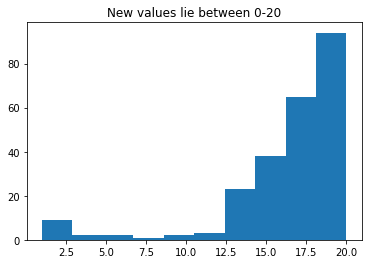

In [20]:
# histogramme normalisé
plt.hist(new_unique_values)

plt.title(f"New values lie between 0-{SCALE_FACTOR}")
plt.show()

In [21]:
for unique_val, new_unique_val in zip(unique_vals, new_unique_values):

    ridxs, cidsx = np.where(img==unique_val)

    for r, c in zip(ridxs, cidsx):
        img[r,c] = new_unique_val


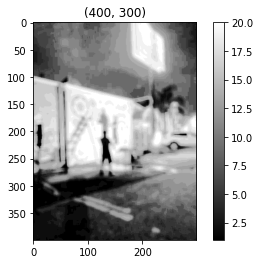

In [22]:
#Photo avec contraste elevé

show(img)


## Testing SIFT
We are loading the image using OpenCV. Extracting keypoints and descriptors and drawing it back on the image.

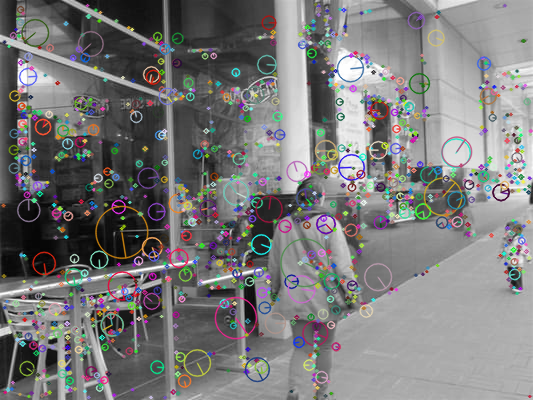

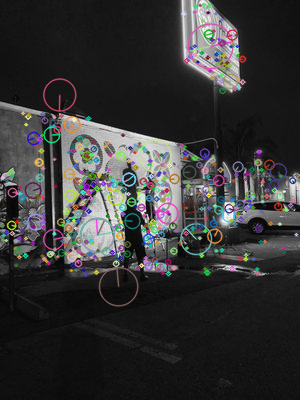

In [23]:
for i in range (0,2):
   
    img = cv.imread(PATH + "\\" + df_train.iloc[i].photo_id)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
   
    sift = cv.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)
    
    
    img=cv.drawKeypoints(gray,kp,img)
    img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    display(Image.fromarray(img,"RGB"))

Rajoutons du flou pour réduire le nombre de descripteurs

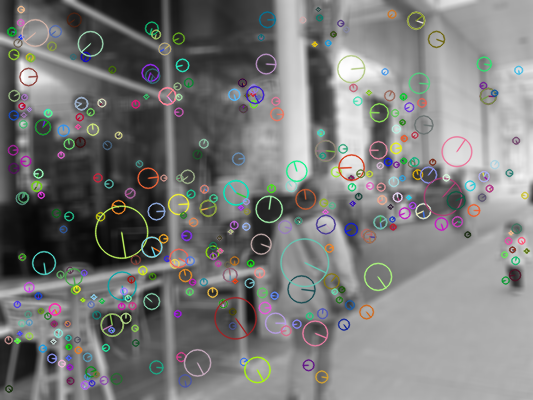

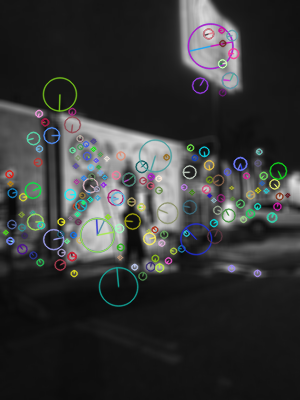

In [24]:
for i in range (0,2):
   
    img = cv.imread(PATH + "\\" + df_train.iloc[i].photo_id)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
        # Ajout de flou gaussien
    gray = Image.fromarray(gray).convert('L')
    gray = gray.filter(ImageFilter.BoxBlur(3))
    gray = np.array(gray)
    
   
    sift = cv.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)    
    
    img=cv.drawKeypoints(gray,kp,img)
    img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    display(Image.fromarray(img,"RGB"))

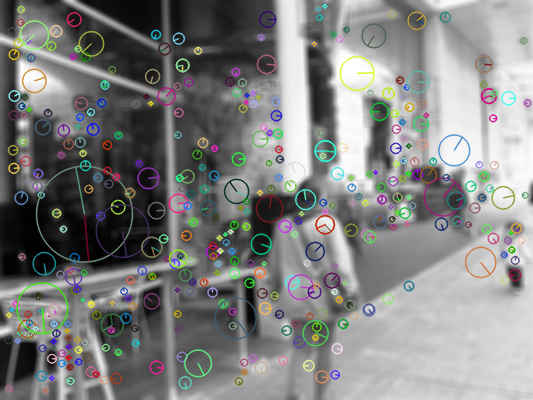

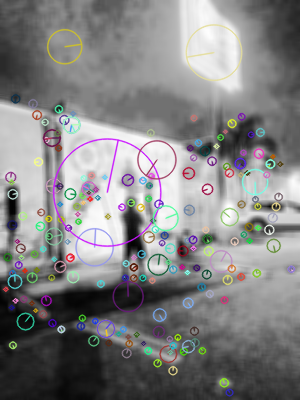

In [25]:
for i in range (0,2):
   
    img = cv.imread(PATH + "\\" + df_train.iloc[i].photo_id)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    # Egalise histogramme
    gray = cv.equalizeHist(gray)
        # Ajout de flou gaussien
    gray = Image.fromarray(gray).convert('L')
    gray = gray.filter(ImageFilter.BoxBlur(3))
    gray = np.array(gray)
    

    
    
   
    sift = cv.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)    
    
    img=cv.drawKeypoints(gray,kp,img)
    img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    display(Image.fromarray(img,"RGB"))

In [26]:
df_train = df_train.reset_index(drop=True)
df_train

,photo_id,label,business_id,caption
0,tpzMwiNcWOnuM1jYvjNLRA.jpg,outside,JbmXVkmJtX8VpRj239b41A,
1,bhp_9JOwY8L5ELftSiSNvQ.jpg,outside,1hzqU--WKTPU9gDYmaQiFA,3 so pretty and it is not even done!
2,hhm39x5Cpm-_xquazQVRZQ.jpg,food,n3qGJmszol--_R6xzHcK1Q,Isn't it eye pleasing? Delicious as well :)*
3,3mBIkW-BMU8hDSjGoLj5ng.jpg,food,IKWsLkiJLA4YwiIoxnaZaQ,
4,dPavECIhN1GBJg1ik-ZILQ.jpg,outside,5ABERR9SNdO6I9U4dcJnyg,"Considering the source\, we know it's not true."
...,...,...,...,...
495,DtC9JJPXVEVNUS_VC_r2oQ.jpg,menu,F0eaHDnN_-zF7KPZu1a2NQ,"Wine\, beer and cocktail menu and the late nig..."
496,4q2omAxInbmHCmQ1fTFQ6A.jpg,menu,WAUlzuTQ1pQOP6HnyC9l9A,Available daily selection
497,T5G3gDVk65B-SiEFlrGMBQ.jpg,menu,ysdjJlbPEqkOzsSrPDQwMQ,Menus fourseason boba tea
498,tZrQZoESdnq30rT0ZdTbwQ.jpg,food,yK8aAyfrM0wa4Bhca91epw,


## Creation du sac de variables

In [27]:
PATH + df_train.iloc[i].photo_id

'D:\\projet6\\data\\yelp_photos\\photos\\yelp_photos\\photosbhp_9JOwY8L5ELftSiSNvQ.jpg'

In [28]:
%%time
descriptors = []

for i, val in df_train[0:500].iterrows():
    # Lis l'image
    img = cv.imread(PATH + "\\" + df_train.iloc[i].photo_id)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    # Egalise histogramme
    gray = cv.equalizeHist(gray)


    # Gaussian Blur
    gray = Image.fromarray(gray).convert('L')
    gray = gray.filter(ImageFilter.BoxBlur(0))
    gray = np.array(gray)

    # Desctripteurs
    sift = cv.SIFT_create()
    kp, desc = sift.detectAndCompute(gray,None)
    try: 
        descriptors.append(desc[:])
    except Exception: 
        print('no')

Wall time: 33.7 s


In [29]:
print(len(descriptors))
print(descriptors[0].shape)

500
(1858, 128)


In [30]:
descriptors_vstacked = np.vstack(descriptors)
print(descriptors_vstacked.shape)

(627971, 128)


## KMeans clustering

In [31]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [32]:
k = int(round(np.sqrt(len(descriptors_vstacked)),0))

In [33]:
%%time
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=42)
kmeans.fit(descriptors_vstacked)

Wall time: 1min 17s


MiniBatchKMeans(init_size=2376, n_clusters=792, random_state=42)

In [34]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("error  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation de matrice d'histogramme
hist_vectors=[]

for i, image_desc in enumerate(descriptors) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

0
100
200
300
400


#### TSNE

In [35]:
tsne = manifold.TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(im_features)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_train["label"]
print(df_tsne.shape)


D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.

(500, 3)


In [36]:
df_tsne.head()

,tsne1,tsne2,class
0,3.776378,-2.248067,outside
1,0.820689,3.744629,outside
2,7.905711,1.730361,food
3,3.778769,5.033347,food
4,-0.130166,-1.187962,outside


In [37]:
X_tsne.shape

(500, 2)

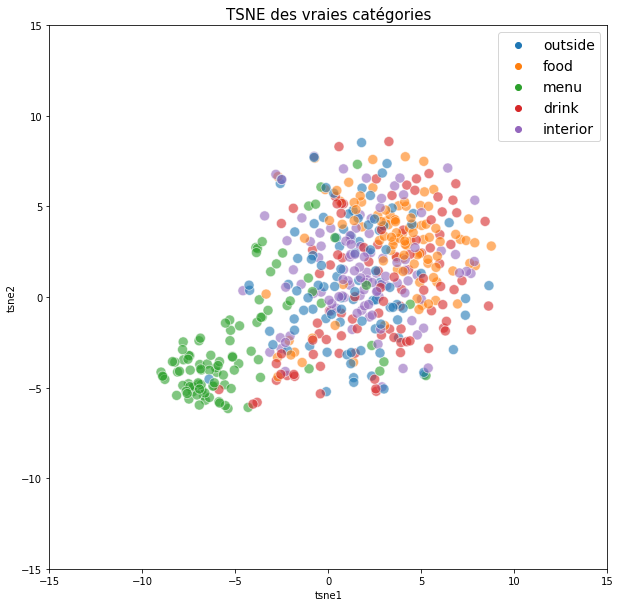

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne, s=100, alpha=0.6)
plt.title('TSNE des vraies catégories', fontsize = 15)
plt.xlabel('tsne1', fontsize = 10)
plt.ylabel('tsne2', fontsize = 10)
plt.legend(prop={'size': 14})

plt.ylim(-15, 15)
plt.xlim(-15, 15)

plt.show()

In [39]:
df_tsne

,tsne1,tsne2,class
0,3.776378,-2.248067,outside
1,0.820689,3.744629,outside
2,7.905711,1.730361,food
3,3.778769,5.033347,food
4,-0.130166,-1.187962,outside
...,...,...,...
495,-6.200915,-4.919026,menu
496,-3.866149,2.453097,menu
497,-6.127864,-4.736101,menu
498,1.489669,4.822873,food


In [40]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=42)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(500, 4)


In [41]:
score = silhouette_score(X_tsne, cls.labels_)  
score


0.3753567

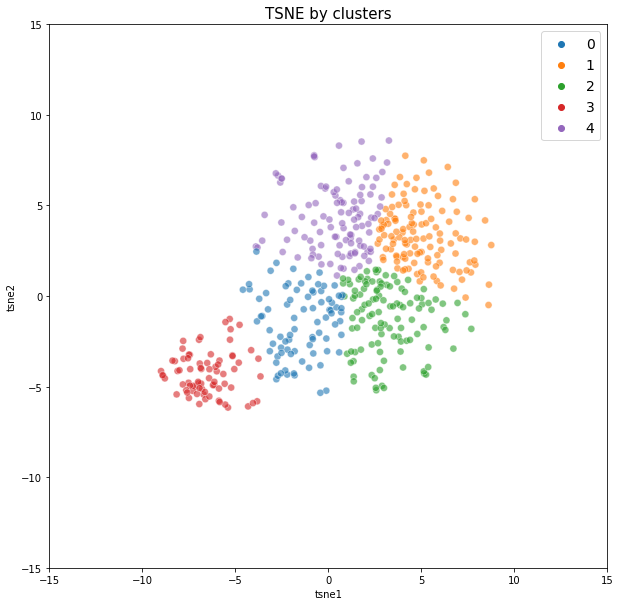

ARI :  0.18658258024884092


D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",  s=50, alpha=0.6, palette=sns.color_palette('tab10', n_colors=5))

plt.title('TSNE by clusters', fontsize = 15)
plt.xlabel('tsne1', fontsize = 10)
plt.ylabel('tsne2', fontsize = 10)
plt.legend(prop={'size': 14})

plt.ylim(-15, 15)
plt.xlim(-15, 15)

plt.show()

labels = df_train["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))


# NLP

In [44]:
#nbReviews = 50000
#chunks = pd.read_json('yelp_dataset.json', lines=True, chunksize = nbReviews)

In [45]:
df = pd.read_csv('yelp_reviews_restaurants_categories.csv',encoding= 'UTF-8')

In [46]:
df

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,attributes,categories,user_id,stars_y,text,date
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",93z0yh-sUpGZS-cSKu6xxA,5,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",Q_CZIvnsDHjpls-EPzzG7Q,2,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00
2,2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",rqxTSFFj5fZNmabY1fmTlw,5,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48
3,3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",vNPxlt5f50q0e2nVAScW3Q,4,Went to this place with my family over the wee...,2018-04-04 21:16:50
4,4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",eXRC79iX60xwA1UuGRuWNg,4,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52349,52349,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Italian, Restaurants",ex_hpnCTIkA_9mWAimq5KQ,5,I went there for a second time and boy did I h...,2018-07-08 19:23:40
52350,52350,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Italian, Restaurants",jJufFREcmIT0SoKhOJZNWg,5,First time visiting this location and let me b...,2017-12-17 03:57:14
52351,52351,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Italian, Restaurants",xAamVocMnjawehmhmrqnPA,3,Sat at the bar. Tamala not exactly good at mul...,2015-06-11 00:05:57
52352,52352,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Italian, Restaurants",J3QrvKLoYljgGZHahxC5Tw,5,I can't remember I had Italian food better the...,2015-08-22 03:10:23


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


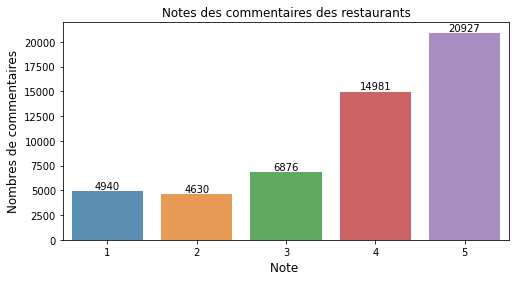

In [47]:
x=df.stars_y.value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Notes des commentaires des restaurants")
plt.ylabel('Nombres de commentaires', fontsize=12)
plt.xlabel('Note ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


In [49]:
df.text.loc[2]

"This was the place the be on Friday Night! If you're looking for the best French Onion Soup in Boulder, paired with the best craft beer selection on Pearl Street. Go. Go now!"

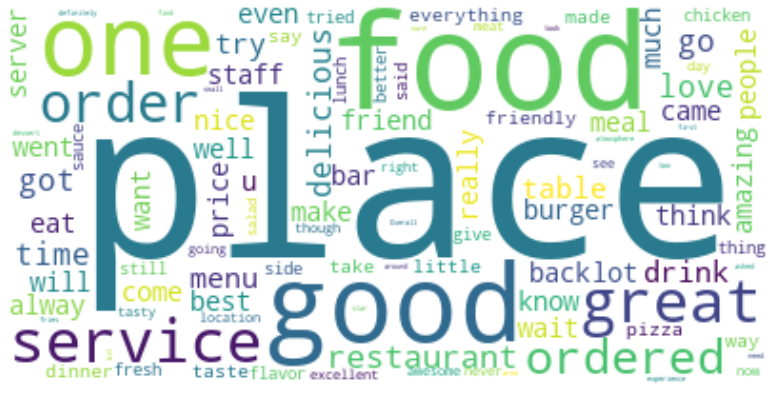

In [50]:
# Mask image

text = " ".join(i for i in df.text)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100,  contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing commentaires

In [51]:
texts = []
for review in df.text:
    texts.append(review)

### Tokenization

In [52]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [53]:
texts_tokens = tokenize(texts)

In [54]:
texts_tokens[2]

['this',
 'place',
 'friday',
 'night',
 'looking',
 'best',
 'french',
 'onion',
 'soup',
 'boulder',
 'paired',
 'with',
 'best',
 'craft',
 'beer',
 'selection',
 'pearl',
 'street']

### Retrait des Stopwords

In [55]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mikozocouye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
texts_filtered = removeSW(texts_tokens)

In [58]:
texts_filtered[2]

['place',
 'friday',
 'night',
 'looking',
 'best',
 'french',
 'onion',
 'soup',
 'boulder',
 'paired',
 'best',
 'craft',
 'beer',
 'selection',
 'pearl',
 'street']

### Lemmatization

In [59]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)
    
    return texts_lem

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mikozocouye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
texts_lem = lemma(texts_filtered)

In [62]:
texts_lem[2]

['place',
 'friday',
 'night',
 'look',
 'best',
 'french',
 'onion',
 'soup',
 'boulder',
 'pair',
 'best',
 'craft',
 'beer',
 'selection',
 'pearl',
 'street']

### Jointure

In [63]:
texts_string = []
for text in texts_lem:
    string = ' '
    string = string.join(text)
    texts_string.append(string)

In [64]:
texts_string[2]

'place friday night look best french onion soup boulder pair best craft beer selection pearl street'

##  LDA


In [65]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


### Sac de mots

In [66]:
vectorizer = CountVectorizer(max_df=0.90, min_df=5)
X = vectorizer.fit_transform(texts_string)
feature_names =  vectorizer.get_feature_names()

X.toarray().shape

(52354, 11828)

In [102]:
lda = LatentDirichletAllocation(
        n_components=8,
        max_iter=12
)

lda.fit_transform(X)

array([[0.08924857, 0.43336855, 0.00245501, ..., 0.00245514, 0.00245506,
        0.18120776],
       [0.00195466, 0.00195466, 0.00195457, ..., 0.0019547 , 0.00195551,
        0.00195536],
       [0.00736029, 0.4395584 , 0.00737908, ..., 0.00737305, 0.00736744,
        0.0073692 ],
       ...,
       [0.02085237, 0.02086236, 0.0208634 , ..., 0.02085395, 0.02088861,
        0.0208702 ],
       [0.00162552, 0.00162656, 0.00162615, ..., 0.66005824, 0.07624051,
        0.17767099],
       [0.00189661, 0.00189727, 0.00189744, ..., 0.2843378 , 0.15023672,
        0.0018981 ]])

In [103]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, feature_names, no_top_words)


Topic 0:
tacos taco chip mexican salsa hotel like good order sushi
Topic 1:
pizza sandwich good like cheese place bread order salad make
Topic 2:
chicken good order food rice like place fry sauce soup
Topic 3:
order food time come service take wait go back would
Topic 4:
place good drink like food table seat night great beer
Topic 5:
dish good menu great order restaurant delicious food dinner wine
Topic 6:
burger fry good like coffee place order burgers time cheese
Topic 7:
food great place service good love always friendly best time


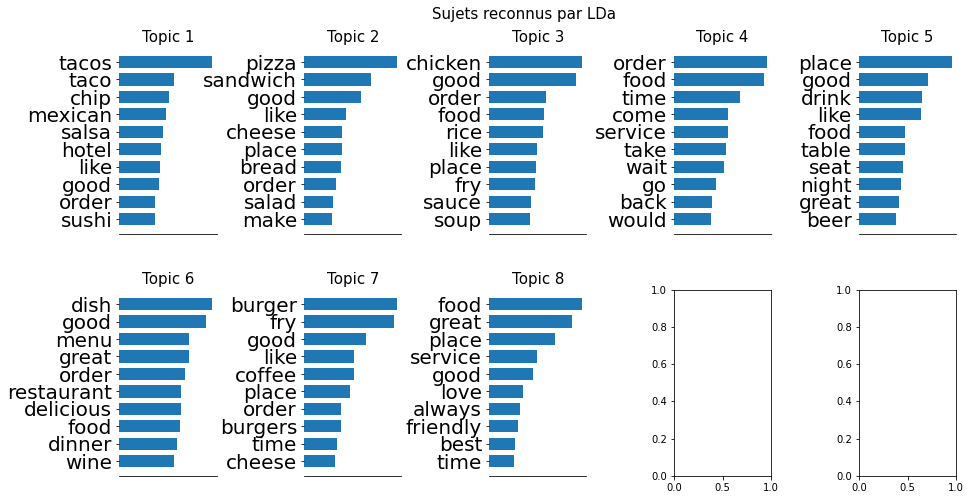

In [104]:
plot_top_words(lda, feature_names, no_top_words,'Sujets reconnus par LDa')

In [70]:
dictionary = gensim.corpora.Dictionary(texts_lem)
len(dictionary.cfs)

39147

In [71]:
dictionary.filter_extremes(no_below=15, no_above=0.5)
len(dictionary.cfs)

6583

In [72]:
bow_corpus = [dictionary.doc2bow(doc) for doc in texts_lem]

In [73]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))


Number of unique tokens: 6583
Number of documents: 52354


In [74]:
lda_model_coherence = []
for i in range (2,15):
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=2, workers=4)
    cm = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    lda_model_coherence.append(coherence)

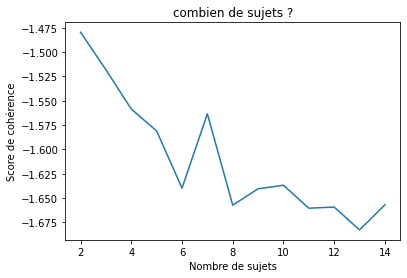

In [75]:
plt.plot(range(2, 15),lda_model_coherence)
plt.xlabel('Nombre de sujets')
plt.ylabel('Score de cohérence')
plt.title('combien de sujets ?')
plt.show()


In [76]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=4)


In [77]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.013*"table" + 0.011*"come" + 0.009*"wait" + 0.008*"time" + 0.008*"place" + 0.008*"service" + 0.008*"food" + 0.007*"order" + 0.007*"seat" + 0.006*"great"
Topic: 1 Word: 0.022*"order" + 0.021*"chicken" + 0.019*"place" + 0.014*"fry" + 0.013*"good" + 0.012*"pizza" + 0.012*"sandwich" + 0.012*"food" + 0.010*"best" + 0.008*"like"
Topic: 2 Word: 0.023*"food" + 0.015*"place" + 0.012*"good" + 0.011*"like" + 0.009*"make" + 0.009*"order" + 0.009*"service" + 0.009*"time" + 0.008*"come" + 0.007*"take"
Topic: 3 Word: 0.011*"dish" + 0.011*"good" + 0.010*"chicken" + 0.009*"like" + 0.009*"order" + 0.009*"rice" + 0.009*"food" + 0.008*"sauce" + 0.007*"would" + 0.006*"come"
Topic: 4 Word: 0.034*"food" + 0.032*"great" + 0.025*"good" + 0.020*"place" + 0.019*"service" + 0.014*"come" + 0.011*"back" + 0.011*"time" + 0.009*"love" + 0.008*"definitely"
Topic: 5 Word: 0.013*"good" + 0.011*"place" + 0.009*"love" + 0.008*"like" + 0.008*"great" + 0.008*"make" + 0.007*"come" + 0.007*"food" + 0.007*"del

In [78]:
vis = gensimvis.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Mikozocouye\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### Représentation PCA 3D

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from gensim.models import LdaModel
from gensim import corpora
from sklearn.manifold import TSNE

In [83]:
def LDA_tSNE_topics_vis(dimension='both',
                        corpus=None, 
                        num_topics=10,
                        remove_3d_outliers=False,
                        save_png=False):
    """
    Returns the outputs of an LDA model plotted using t-SNE (t-distributed Stochastic Neighbor Embedding)

    Note: t-SNE reduces the dimensionality of a space such that similar points will be closer and dissimilar points farther

    Parameters
    ----------
        dimension : str (default=both)
            The dimension that t-SNE should reduce the data to for visualization
            Options: 2d, 3d, and both (a plot with two subplots)

        corpus : list, list of lists
            The tokenized and cleaned text corpus over which analysis should be done

        num_topics : int (default=10)
            The number of categories for LDA based approaches

        remove_3d_outliers : bool (default=False)
            Whether to remove outliers from a 3d plot

        save_png : bool (default=False)
            Whether to save the figure as a png

    Returns
    -------
        A t-SNE lower dimensional representation of an LDA model's topics and their constituent members
    """

    df_topic_coherences = pd.DataFrame(columns = ['topic_{}'.format(i) for i in range(num_topics)])

    for i in range(len(bow_corpus)):
        df_topic_coherences.loc[i] = [0] * num_topics
        
        output = lda_model.__getitem__(bow=bow_corpus[i], eps=0)
    
        for j in range(len(output)):
            topic_num = output[j][0]
            coherence = output[j][1]
            df_topic_coherences.iloc[i, topic_num] = coherence

    for i in range(num_topics):
        df_topic_coherences.iloc[:, i] = df_topic_coherences.iloc[:, i].astype('float64', copy=False)

    df_topic_coherences['main_topic'] = df_topic_coherences.iloc[:, :num_topics].idxmax(axis=1)

    if num_topics > 10:
        # cubehelix better for more than 10 colors
        colors = sns.color_palette("cubehelix", num_topics)
    else:
        # The default sns color palette
        colors = sns.color_palette('deep', num_topics)

    tsne_2 = None
    tsne_3 = None
    if dimension == 'both':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    elif dimension == '2d':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
    elif dimension == '3d':
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    else:
        ValueError("An invalid value has been passed to the 'dimension' argument - choose from 2d, 3d, or both.")

    if tsne_2 is not None:
        tsne_results_2 = tsne_2.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_2 = pd.DataFrame()
        df_tsne_2['tsne-2d-d1'] = tsne_results_2[:,0]
        df_tsne_2['tsne-2d-d2'] = tsne_results_2[:,1]
        df_tsne_2['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_2['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_2['main_topic']]

        df_tsne_2['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_2['main_topic']]
        df_tsne_2 = df_tsne_2.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)
    
    if tsne_3 is not None:
        colors = [c for c in sns.color_palette()]

        tsne_results_3 = tsne_3.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_3 = pd.DataFrame()
        df_tsne_3['tsne-3d-d1'] = tsne_results_3[:,0]
        df_tsne_3['tsne-3d-d2'] = tsne_results_3[:,1]
        df_tsne_3['tsne-3d-d3'] = tsne_results_3[:,2]
        df_tsne_3['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_3['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_3['main_topic']]

        df_tsne_3['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_3['main_topic']]
        df_tsne_3 = df_tsne_3.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)

        if remove_3d_outliers:
            # Remove those rows with values that are more than three standard deviations from the column mean
            for col in ['tsne-3d-d1', 'tsne-3d-d2', 'tsne-3d-d3']:
                df_tsne_3 = df_tsne_3[np.abs(df_tsne_3[col] - df_tsne_3[col].mean()) <= (3 * df_tsne_3[col].std())]

    if tsne_2 is not None and tsne_3 is not None:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, # pylint: disable=unused-variable
                                       figsize=(20,10))
        ax1.axis('off')

    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

    if tsne_2 is not None and tsne_3 is not None:
        # Plot tsne_2, with tsne_3 being added later
        ax1 = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                              hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)
        
        light_grey_tup = (242/256, 242/256, 242/256)
        ax1.set_facecolor(light_grey_tup)
        ax1.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax1.set_xlabel('tsne-d1', fontsize=20)
        ax1.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax1.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax1.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                   facecolor=light_grey_tup)

    elif tsne_2 is not None:
        # Plot just tsne_2
        ax = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                             hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)

        ax.set_facecolor(light_grey_tup)
        ax.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                  facecolor=light_grey_tup)

    if tsne_2 is not None and tsne_3 is not None:
        # tsne_2 has been plotted, so add tsne_3
        ax2 = fig.add_subplot(121, projection='3d')
        ax2.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                    ys=df_tsne_3['tsne-3d-d2'], 
                    zs=df_tsne_3['tsne-3d-d3'],  
                    c=df_tsne_3['color'],
                    alpha=0.3)

        ax2.set_facecolor('white')
        ax2.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax2.set_xlabel('tsne-d1', fontsize=20)
        ax2.set_ylabel('tsne-d2', fontsize=20)
        ax2.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines and order their colors to match tsne_2
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in legend_order]
            ax2.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                       loc='upper left', facecolor=(light_grey_tup))

    elif tsne_3 is not None:
        # Plot just tsne_3
        ax.axis('off')
        ax.set_facecolor('white')
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                   ys=df_tsne_3['tsne-3d-d2'], 
                   zs=df_tsne_3['tsne-3d-d3'],  
                   c=df_tsne_3['color'],
                   alpha=0.3)

        ax.set_facecolor('white')
        ax.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)
        ax.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in range(len(colors))]
            ax.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                      loc='upper left', facecolor=light_grey_tup)

    if save_png:
        plt.savefig('LDA_tSNE_{}.png'.format(time.strftime("%Y%m%d-%H%M%S")), bbox_inches='tight', dpi=500)

    plt.show()


D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.

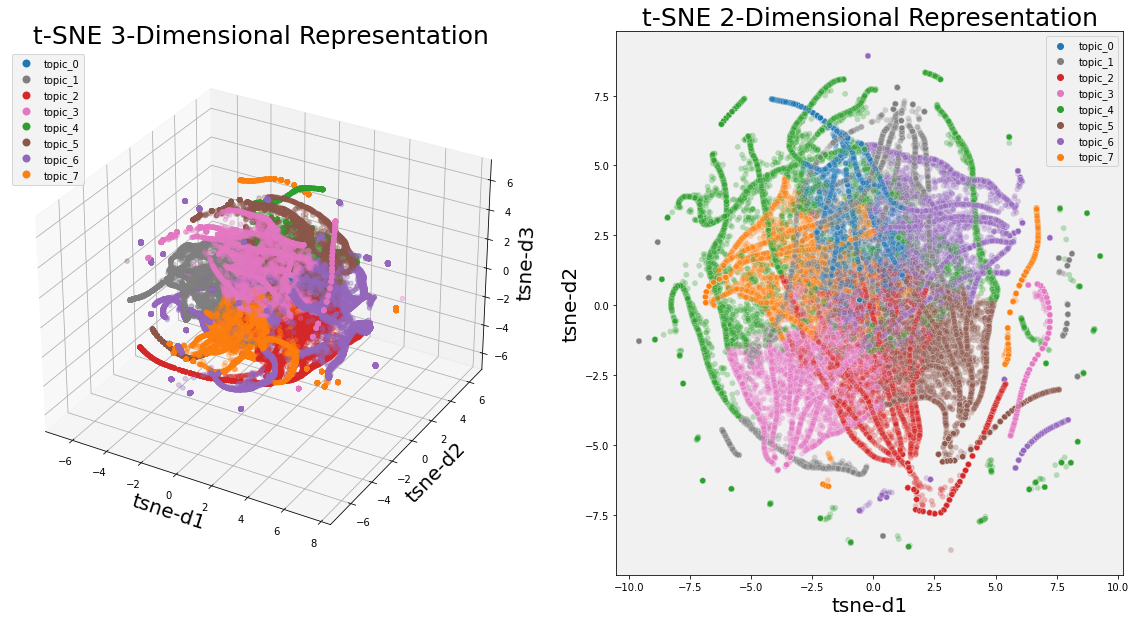

In [84]:
#LDA_tSNE_topics_vis()

# API

In [1]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

In [2]:
API_KEY = "7C53dwqZrOWFg-PEdR9w_7nflp4V2_EDnnrdWBiIEHAKo9X7OduQd66qfl1aC1ZdH1fFMSlUI_7mVpgOobhlLrZhJgSGYY4iCCE-EqUXu15rh3hUBet3lpbn77TtYHYx"




In [3]:
# define our authentication process.
header = {'Authorization': 'bearer {}'.format(API_KEY),
          'Content-Type':"application/json"}

# Build the request framework
transport = RequestsHTTPTransport(url='https://api.yelp.com/v3/graphql', headers=header, use_json=True)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)
        

results = []

query = gql("""
                                       {
            search(term : "restaurant", location : "Paris", limit : 50) {
                business{
                    name
                    id
                    reviews {
                        id
                        text
                        rating
                    }
                }
            }
        }""")

# execute and print this query
print('-'*100)
print(client.execute(query))

results.append(client.execute(query))

----------------------------------------------------------------------------------------------------
{'search': {'business': [{'name': 'Le Comptoir de la Gastronomie', 'id': '-0iLH7iQNYtoURciDpJf6w', 'reviews': [{'id': '4f5MWUZEuw4tpTd5OouLRQ', 'text': "I've been meaning to review this place forever... The food here is just fantastic, everything is delicious. Don't miss out on the ravioli, the cassoulet and...", 'rating': 5}, {'id': '63HPACk32eYXgFyItrYIGg', 'text': 'A small and cozy cafe/shop with a good wine and other French delicacies. Came here for dinner every day when I was in Paris. If you love foie Gras    And...', 'rating': 4}, {'id': '6qgF1sIQKeN5LEkEuR-MNg', 'text': 'Another wonderful Yelp find, thank you!  Le Comptoir is an unpretentious bistro with amazing food.  The burgundy snails were great, pan seared foie gras...', 'rating': 4}]}, {'name': 'Bistro des Augustins', 'id': 'IU9_wVOGBKjfqTTpAXpKcQ', 'reviews': [{'id': 'FJno89CUP14rQaR3LYbrqQ', 'text': 'I came back to this 

In [4]:
# define our authentication process.
header = {'Authorization': 'bearer {}'.format(API_KEY),
          'Content-Type':"application/json"}

# Build the request framework
transport = RequestsHTTPTransport(url='https://api.yelp.com/v3/graphql', headers=header, use_json=True)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)
        
query = gql("""
                                       {
            search(term : "restaurant", location : "Paris", limit : 50, offset : 50) {
                business{
                    name
                    id
                    reviews {
                        id
                        text
                        rating
                    }
                }
            }
        }""")

# execute and print this query
print('-'*100)
print(client.execute(query))

results.append(client.execute(query))

----------------------------------------------------------------------------------------------------
{'search': {'business': [{'name': 'Chez le Libanais', 'id': 'XZX3qBgUAcCYGNoIhHGq-g', 'reviews': [{'id': 'oD-Y350HbMaSM6BDvo1sVg', 'text': "Bomb. Can't wait to get back to to try the other half of the menu!\n\nI would fly to Paris to eat here. Not kidding the food, the staff the area all make my...", 'rating': 5}, {'id': 'yLvju1FGMiMs_G9R69NeRw', 'text': 'When we were in Paris this past summer, I knew I wanted to try some cheap, whole in the wall type places. We searched Yelp and found Chez Le Libanais. I...', 'rating': 5}, {'id': 'FD8PrXdSIUYCQANK_vhf6A', 'text': "Went at 3pm Saturday after visiting the louvre. \nThis place is great. They don't close between lunch and dinner which is convenient. Even if you are...", 'rating': 5}]}, {'name': 'La Cuisine de Chez Moi', 'id': 'kdVwJe2eBVgKeeVu99hArQ', 'reviews': [{'id': 'I-r8Nj6xkFOdAkTQlhiABQ', 'text': 'We went as a group of 10.  There wa

In [5]:
# define our authentication process.
header = {'Authorization': 'bearer {}'.format(API_KEY),
          'Content-Type':"application/json"}

# Build the request framework
transport = RequestsHTTPTransport(url='https://api.yelp.com/v3/graphql', headers=header, use_json=True)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)
        
query = gql("""
                                       {
            search(term : "restaurant", location : "Paris", limit : 50, offset : 100) {
                business{
                    name
                    id
                    reviews {
                        id
                        text
                        rating
                    }
                }
            }
        }""")

# execute and print this query
print('-'*100)
print(client.execute(query))

results.append(client.execute(query))

----------------------------------------------------------------------------------------------------
{'search': {'business': [{'name': 'Le Grenier de Notre-Dame', 'id': 'hfe0QLfHwyaiE_HBhkq9AA', 'reviews': [{'id': 'smrj_x5x0i_HdPhP_5Zg7Q', 'text': 'Le Grenier de Notre Dame\n\nThe first vegetarian and macrobiotic restaurant in Paris!\n\nFood****\nThe food came segmented on the plate, as much macrobiotic food...', 'rating': 4}, {'id': 'Irk3H5Dxkowyai4Qz1LyiA', 'text': 'Omg this place was soo good .we ate here twice. Once we were late and the server stayed open for us. Not many vegan dishes but a couple. The first night was...', 'rating': 5}, {'id': 'd7ChDB_puf_x2hf5UN9maA', 'text': "Amazing place! \nFriendliness: We didn't have a reservation but weren't 'eye rolled' like some other reviews suggested. The host /hostess were very friendly,...", 'rating': 5}]}, {'name': 'Ma Kitchen', 'id': '3S4bDOokaO6FZxdYm8S6yg', 'reviews': [{'id': 'kGEx5mzKBOq76TfY9yciXg', 'text': "Amazing, I was staying

In [6]:
# define our authentication process.
header = {'Authorization': 'bearer {}'.format(API_KEY),
          'Content-Type':"application/json"}

# Build the request framework
transport = RequestsHTTPTransport(url='https://api.yelp.com/v3/graphql', headers=header, use_json=True)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)
        
query = gql("""
                                       {
            search(term : "restaurant", location : "Paris", limit : 50, offset : 150) {
                business{
                    name
                    id
                    reviews {
                        id
                        text
                        rating
                    }
                }
            }
        }""")

# execute and print this query
print('-'*100)
print(client.execute(query))

results.append(client.execute(query))

----------------------------------------------------------------------------------------------------
{'search': {'business': [{'name': 'Rumeurs', 'id': 'XW5s4lEwq0ehG4ZerRR_WQ', 'reviews': [{'id': 'G_JPROtgQB_lH1DSkQaJlQ', 'text': "My wife and I have been in Paris almost a week and while we've loved nearly all the adventures, stopping into Thomas's place has been easily the highlight...", 'rating': 5}, {'id': 'ebtIwV0W5wC2hSHhiCS_nA', 'text': 'Amazing Corsican ham and French cheeses with a beautiful bottle of Pouilly Fume. Great local place to enjoy charcuterie', 'rating': 5}]}, {'name': 'David Toutain', 'id': 'OQp17JUwTt26gHc7mhKO9g', 'reviews': [{'id': 'xWdCOSExxtMohkVPmMWgpg', 'text': 'The food here was spectacular, as was the staff. They were attentive and cared SO MUCH. I told them to refuse to speak to me if I used English (I can barely...', 'rating': 5}, {'id': 'uh5PR3lcLVTHUQez5kKm8w', 'text': "I can see how David Toutain got it's Michelin Star. Everything looks beautiful and t

In [9]:
columns = ["id_restaurant","name","review_id","text","rating"]
all_reviews = pd.DataFrame(columns=columns)
all_reviews.head()

,id_restaurant,name,review_id,text,rating


In [10]:
for restaurant in results[0]["search"]["business"]:
  for review in restaurant["reviews"]:
    item={"name": restaurant["name"],
          "id_restaurant": restaurant["id"],
          "review_id": review["id"],
          "text": review["text"],
          "rating": review["rating"]
          }
    all_reviews=all_reviews.append(item, ignore_index=True)

In [11]:
for restaurant in results[1]["search"]["business"]:
  for review in restaurant["reviews"]:
    item={"name": restaurant["name"],
          "id_restaurant": restaurant["id"],
          "review_id": review["id"],
          "text": review["text"],
          "rating": review["rating"]
          }
    all_reviews=all_reviews.append(item, ignore_index=True)

In [12]:
for restaurant in results[2]["search"]["business"]:
  for review in restaurant["reviews"]:
    item={"name": restaurant["name"],
          "id_restaurant": restaurant["id"],
          "review_id": review["id"],
          "text": review["text"],
          "rating": review["rating"]
          }
    all_reviews=all_reviews.append(item, ignore_index=True)

In [13]:
for restaurant in results[3]["search"]["business"]:
  for review in restaurant["reviews"]:
    item={"name": restaurant["name"],
          "id_restaurant": restaurant["id"],
          "review_id": review["id"],
          "text": review["text"],
          "rating": review["rating"]
          }
    all_reviews=all_reviews.append(item, ignore_index=True)
all_reviews.head()

,id_restaurant,name,review_id,text,rating
0,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4f5MWUZEuw4tpTd5OouLRQ,I've been meaning to review this place forever...,5
1,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,63HPACk32eYXgFyItrYIGg,A small and cozy cafe/shop with a good wine an...,4
2,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,6qgF1sIQKeN5LEkEuR-MNg,"Another wonderful Yelp find, thank you! Le Co...",4
3,IU9_wVOGBKjfqTTpAXpKcQ,Bistro des Augustins,FJno89CUP14rQaR3LYbrqQ,I came back to this page to try to recreate th...,5
4,IU9_wVOGBKjfqTTpAXpKcQ,Bistro des Augustins,pFG15h4QGHL3QAx9dGpqaw,Pre-COVID review:\n\nAfter a day of exploring ...,3


In [14]:
len(all_reviews)

575

In [15]:
df_yelp = pd.DataFrame.from_dict(all_reviews)

In [16]:
df_yelp.to_csv(r'reviews_yelp.csv', index = False)

In [17]:
len(results[0]["search"]["business"]) + len(results[1]["search"]["business"]) + len(results[2]["search"]["business"]) +len(results[3]["search"]["business"])

200